## Observations and Insights 

In [42]:
%matplotlib inline

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how = 'outer')
# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
combined['Mouse ID'].nunique()

249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicate_mouse_ids = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 



In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_tumor_data = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = regimen_tumor_data.mean()
tumor_median = regimen_tumor_data.median()
tumor_mode = regimen_tumor_data.agg(lambda x: sts.mode(x)[0])
tumor_variance = regimen_tumor_data.var()
tumor_std_dev = regimen_tumor_data.std()
tumor_sem = regimen_tumor_data.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats = pd.DataFrame({
    'Tumor Volume Mean': tumor_mean,
    'Tumor Volume Median': tumor_median,
    'Tumor Volume Mode': tumor_mode,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Standard Deviation': tumor_std_dev,
    'Tumor Volume SEM': tumor_sem
})
tumor_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Mode,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,45.0,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Found how to return first value of Mode here: https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
easy_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,pd.Series.mode,np.var,np.std,sts.sem])
easy_stats

,mean,median,mode,var,std,sem
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,45.0,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,45.0,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,45.0,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,45.0,59.450562,7.710419,0.573111


## Bar and Pie Charts

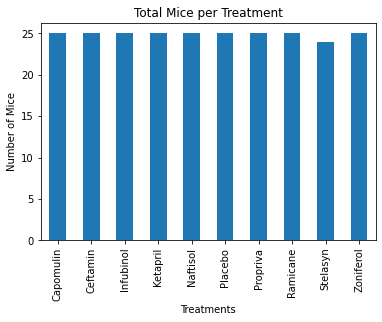

<Figure size 432x288 with 0 Axes>

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_counts = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar', title='Total Mice per Treatment')
mice_counts.set_xlabel('Treatments')
mice_counts.set_ylabel('Number of Mice')
plt.show()
plt.tight_layout()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

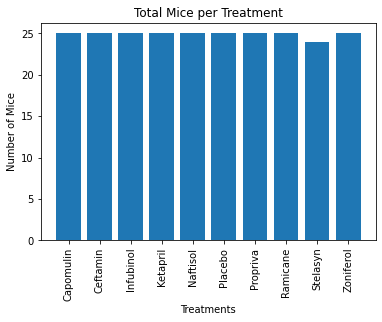

In [52]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Found how to sort a unique list here: https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them
treatments = np.sort(clean_df['Drug Regimen'].unique())
plt.bar(treatments, clean_df.groupby('Drug Regimen')['Mouse ID'].nunique(), align='center')
plt.xlabel('Treatments')
plt.ylabel('Number of Mice')
plt.title('Total Mice per Treatment')
plt.xticks(rotation='vertical')

In [53]:
# Create a new Dataframe Grouped by Sex to get the counts of Male and Females
genders = clean_df.groupby('Sex')
gender_counts = pd.DataFrame(genders['Sex'].count())
gender_counts = gender_counts.rename(columns={'Sex': 'Count'})
gender_counts


,Count
Sex,
Female,930
Male,958


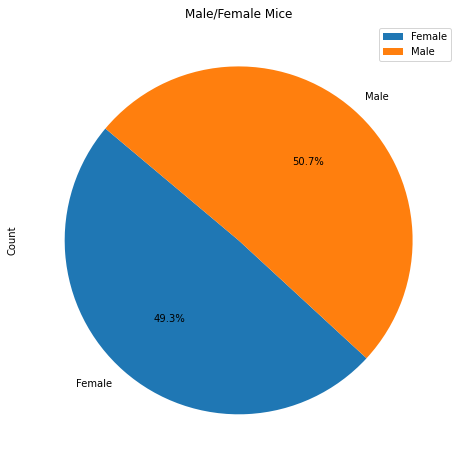

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

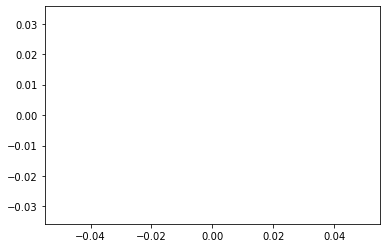

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_graph = gender_counts.plot(kind='pie', y='Count', title= 'Male/Female Mice', startangle=140, figsize=(10,8), autopct='%1.1f%%')
plt.show()
plt.tight_layout()
plt.axis('equal')

(-1.1179900164988374,
 1.1067252436799584,
 -1.1132609815137346,
 1.1081858927805142)

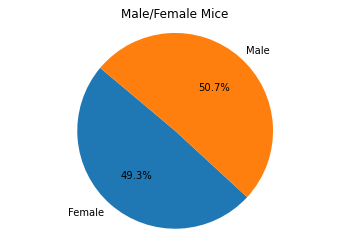

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = gender_counts.reset_index()
plt.pie(gender_counts['Count'], labels= gender_counts['Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Male/Female Mice')
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# for each unique mouse ID, find the greatest timepoint value and then take the tumor volume for that record

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, clean_df, on=['Mouse ID','Timepoint'], how= 'inner')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Loop through each of the 4 treatments in our list
for treatment in promising_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # Use Pandas to give quartile calculations
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # append each treatment and their respective IQR to tumor_vol_data
    tumor_vol_data.append({f"{treatment}'s IQR": iqr})
# Print each treatments IQR
tumor_vol_data    

[{"Capomulin's IQR": 7.781863460000004},
 {"Ramicane's IQR": 9.098536719999998},
 {"Infubinol's IQR": 11.477135160000003},
 {"Ceftamin's IQR": 15.577752179999997}]

In [58]:
# Determine outliers using upper and lower bounds
# Create an empty list to hold outlier values
outliers = []

In [59]:
# Determine outliers using upper and lower bounds
# Loop through each of the treatments
for treatment in promising_treatments:
    # Pull out data specific for each treatments Tumor Volume
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # Use Pandas to give quartile calculations
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Loop through each tumor volume within a treatment to look for outliers
    for x in tumor_volumes:
        if (x > upper_bound) or (x < lower_bound):
            # if x is outside of our bounds then we will add it to our outliers empty set
            outliers.append({f"{treatment} outlier": x})
# Print outliers
outliers

[{'Infubinol outlier': 36.321345799999996}]

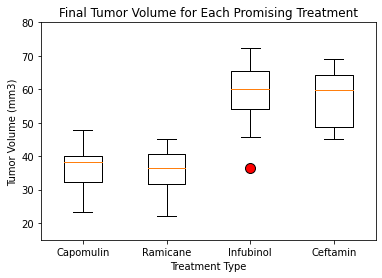

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# create an empty set to hold our data for promising treatments
data = []
# Loop through each of our promising treatments
for treatment in promising_treatments:
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # append our tumor volume data for each treatment to data
    data.append(tumor_volumes)
fig1, ax1 = plt.subplots()
# Add a title and labels to the graph
ax1.set_title('Final Tumor Volume for Each Promising Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatment Type')
# Found how to change outlier points here: https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none', markeredgecolor='black')
ax1.boxplot(data, flierprops=flierprops)
# Update xticks to correspond to each of our promising treatments
plt.xticks([1,2,3,4], promising_treatments)
plt.ylim(15, 80)
plt.show()

## Line and Scatter Plots

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Find all Capomulin mice
Capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


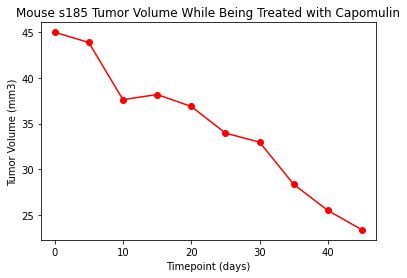

In [62]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Choose an individual mouse ID from the dataframe above
single_mouse = Capomulin.loc[Capomulin['Mouse ID'] == 's185']
# generate line plot
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], color= 'red', marker='o')
# Add title to graph
plt.title('Mouse s185 Tumor Volume While Being Treated with Capomulin')
# Add X and y labels, and xlim
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-2,47)
plt.show()

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Remove all columns but weight and tumor volume from Capomulin data
weight_vs_vol_data = Capomulin[['Weight (g)', 'Tumor Volume (mm3)']]
weight_vs_vol_data = weight_vs_vol_data.rename(columns={'Weight (g)': 'Weight'})
# group by weight
weights = weight_vs_vol_data.groupby('Weight')
# calculate the average tumor volume for each weight
scatter_data = pd.DataFrame(weights['Tumor Volume (mm3)'].mean())
# reset the index to allow me to use the weight column for the graph
scatter_data = scatter_data.reset_index()
scatter_data

,Weight,Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


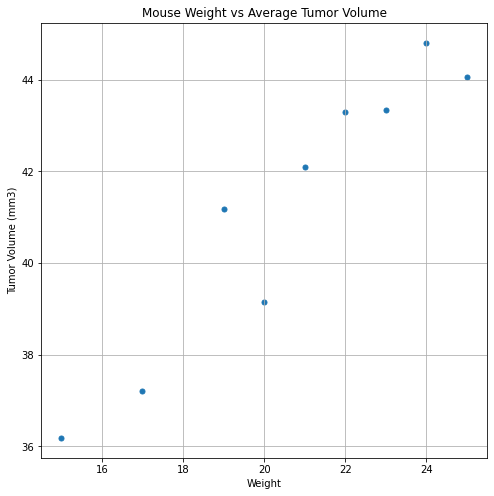

In [64]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data.plot(kind='scatter', x='Weight', y='Tumor Volume (mm3)', grid=True, figsize=(8,8), s=25, title='Mouse Weight vs Average Tumor Volume')
plt.show()

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = scatter_data.iloc[:, 0]
mouse_tumor = scatter_data.iloc[:, 1]
correlation = sts.pearsonr(mouse_weight,mouse_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95
